In [1]:
#| hide
!pip install -Uqq nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
#| hide
from nixtla.utils import in_colab

# Fine-tuning

Fine-tuning is a powerful process for utilizing TimeGPT more effectively. Foundation models such as TimeGPT are pre-trained on vast amounts of data, capturing wide-ranging features and patterns. These models can then be specialized for specific contexts or domains. With fine-tuning, the model's parameters are refined to forecast a new task, allowing it to tailor its vast pre-existing knowledge towards the requirements of the new data. Fine-tuning thus serves as a crucial bridge, linking TimeGPT's broad capabilities to your tasks specificities.

Concretely, the process of fine-tuning consists of performing a certain number of training iterations on your input data minimizing the forecasting error. The forecasts will then be produced with the updated model. To control the number of iterations, use the `finetune_steps` argument of the `forecast` method.

## 1. Import packages
First, we import the required packages and initialize the Nixtla client

In [6]:
import pandas as pd
from nixtla import NixtlaClient
from utilsforecast.losses import mae, mse
from utilsforecast.evaluation import evaluate

In [8]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'nixak-PseOV5xcLQgFjLnmaFe2YibxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxsMhxbLbbMgl79gmK9TE9BoWhSWD'
)

## 2. Load data

In [11]:
import pandas as pd

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Ensure the 'Month' column is parsed as datetime
data['Month'] = pd.to_datetime(data['Month'])

# Rename columns for consistency
data.rename(columns={'Month': 'ds', 'Passengers': 'y'}, inplace=True)

# Display the structure of the dataset
print(data.info())

# Dataset ready for time series modeling
print(data.head())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None
          ds    y
0 1949-01-01  112
1 1949-02-01  118
2 1949-03-01  132
3 1949-04-01  129
4 1949-05-01  121


## 3. Fine-tuning

Here, `finetune_steps=10` means the model will go through 10 iterations of training on your time series data.

In [12]:
timegpt_fcst_finetune_df = nixtla_client.forecast(
    df=data, h=12, finetune_steps=10,
    time_col='ds', target_col='y',
)

> 📘 Available models in Azure AI
>
> If you are using an Azure AI endpoint, please be sure to set `model="azureai"`:
>
> `nixtla_client.forecast(..., model="azureai")`
>
> For the public API, we support two models: `timegpt-1` and `timegpt-1-long-horizon`.
>
> By default, `timegpt-1` is used. Please see [this tutorial](https://docs.nixtla.io/docs/tutorials-long_horizon_forecasting) on how and when to use `timegpt-1-long-horizon`.

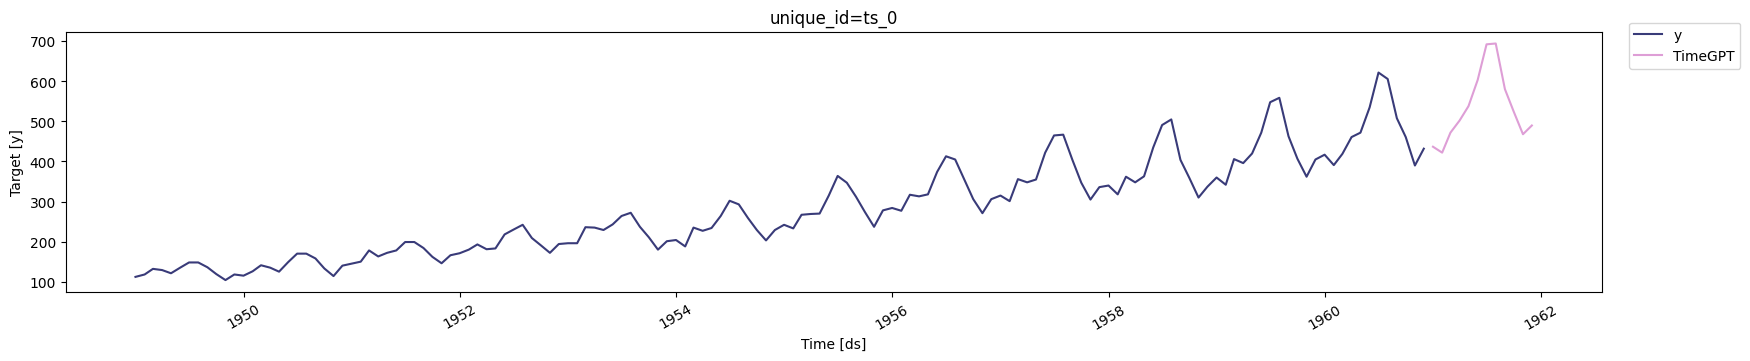

In [14]:
nixtla_client.plot(
    data, timegpt_fcst_finetune_df,
    time_col='ds', target_col='y',
)

Keep in mind that fine-tuning can be a bit of trial and error. You might need to adjust the number of `finetune_steps` based on your specific needs and the complexity of your data. Usually, a larger value of `finetune_steps` works better for large datasets.

It's recommended to monitor the model's performance during fine-tuning and adjust as needed. Be aware that more `finetune_steps` may lead to longer training times and could potentially lead to overfitting if not managed properly.

Remember, fine-tuning is a powerful feature, but it should be used thoughtfully and carefully.

For a detailed guide on using a specific loss function for fine-tuning, check out the [Fine-tuning with a specific loss function](https://docs.nixtla.io/docs/tutorials-fine_tuning_with_a_specific_loss_function) tutorial.

Read also our detailed tutorial on [controlling the level of fine-tuning](https://docs.nixtla.io/docs/tutorials-finetune_depth_finetuning) using `finetune_depth`.